In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [3]:
path = '/content/blogs.csv'

df = pd.read_csv(path)
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

df.head()

Dataset shape: (2000, 2)
Columns: ['Data', 'Labels']


,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [4]:
print(df.isnull().sum())

# Select text and label columns
text_col = 'Data'
label_col = 'Labels'
df = df.dropna(subset=[text_col, label_col]).reset_index(drop=True)
print("Shape after dropping missing values:", df.shape)

Data      0
Labels    0
dtype: int64
Shape after dropping missing values: (2000, 2)


In [5]:
print(df[label_col].value_counts())

Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          100
talk.politics.mideast       100
talk.politics.misc          100
talk.religion.misc          100
Name: count, dtype: int64


In [6]:
stop_words = set(ENGLISH_STOP_WORDS)

In [7]:
def clean_text(s):
    s = str(s).lower()
    s = re.sub(r'http\S+|www\S+|https\S+', '', s)
    s = re.sub(r'[^a-z\s]', ' ', s)
    s = re.sub(r'\s+', ' ', s).strip()
    tokens = [w for w in s.split() if w not in stop_words]
    return " ".join(tokens)

In [8]:
df['clean_text'] = df[text_col].apply(clean_text)

df[[text_col, 'clean_text', label_col]].head(8)

,Data,clean_text,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupe srv cs cmu edu magnesium club ...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups alt atheism path cantaloupe srv cs ...,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupe srv cs cmu edu das news harvar...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupe srv cs cmu edu magnesium club ...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupe srv cs cmu edu alt atheism tal...,alt.atheism
5,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,xref cantaloupe srv cs cmu edu talk abortion a...,alt.atheism
6,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups alt atheism path cantaloupe srv cs ...,alt.atheism
7,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupe srv cs cmu edu das news harvar...,alt.atheism


In [9]:
vectorizer = TfidfVectorizer(max_features=4000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['clean_text'])
y = df[label_col].astype(str)

In [10]:
print("TF-IDF matrix shape:", X.shape)

TF-IDF matrix shape: (2000, 4000)


In [11]:
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, df.index, test_size=0.2, random_state=42, stratify=y
)
print("Train/Test sizes:", X_train.shape, X_test.shape)

Train/Test sizes: (1600, 4000) (400, 4000)


In [12]:
model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)

MultinomialNB()

In [13]:
y_pred = model.predict(X_test)

In [14]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

In [15]:
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8700
Precision: 0.8810
Recall: 0.8700
F1-score: 0.8670


In [16]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))


Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       1.00      0.55      0.71        20
           comp.graphics       0.86      0.90      0.88        20
 comp.os.ms-windows.misc       1.00      1.00      1.00        20
comp.sys.ibm.pc.hardware       0.80      1.00      0.89        20
   comp.sys.mac.hardware       1.00      0.90      0.95        20
          comp.windows.x       0.89      0.85      0.87        20
            misc.forsale       0.90      0.95      0.93        20
               rec.autos       0.80      1.00      0.89        20
         rec.motorcycles       0.85      0.85      0.85        20
      rec.sport.baseball       0.95      0.90      0.92        20
        rec.sport.hockey       0.91      1.00      0.95        20
               sci.crypt       0.95      1.00      0.98        20
         sci.electronics       1.00      0.65      0.79        20
                 sci.med       0.94      0.85     

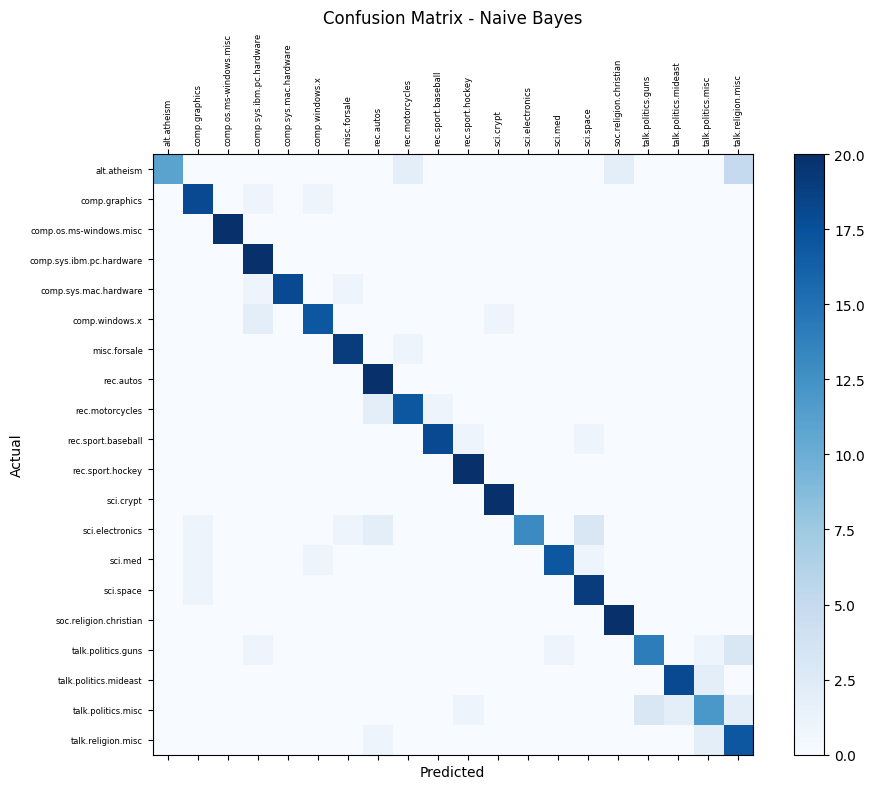

In [17]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
fig, ax = plt.subplots(figsize=(10,8))
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(range(len(model.classes_)), model.classes_, rotation=90, fontsize=6)
plt.yticks(range(len(model.classes_)), model.classes_, fontsize=6)
plt.colorbar(cax)
plt.tight_layout()
plt.show()

In [18]:
test_results = df.loc[idx_test].reset_index(drop=True).copy()
test_results['true_label'] = y_test.reset_index(drop=True)
test_results['pred_label'] = y_pred
test_results['pred_prob'] = model.predict_proba(X_test).max(axis=1)

In [19]:
sentiment_scores = []
use_vader = False
try:
    from nltk.sentiment import SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    use_vader = True
except Exception as e:
    pos_words = set(["good","great","excellent","positive","happy","love","liked","best","amazing","wonderful","nice","success"])
    neg_words = set(["bad","poor","terrible","negative","sad","hate","worst","awful","problem","angry","disappoint"])

for txt in df['clean_text']:
    if use_vader:
        sc = sia.polarity_scores(txt)['compound']
        sentiment = 'positive' if sc>=0.05 else ('negative' if sc<=-0.05 else 'neutral')
    else:
        tokens = txt.split()
        s = sum(1 for t in tokens if t in pos_words) - sum(1 for t in tokens if t in neg_words)
        sentiment = 'positive' if s>0 else ('negative' if s<0 else 'neutral')
    sentiment_scores.append(sentiment)

df['sentiment'] = sentiment_scores
# Map sentiment for test_results
test_results['sentiment'] = df.loc[test_results.index, 'sentiment'].values

# Save predictions + sentiment
out_path = '/content/blogs.csv'
test_results.to_csv(out_path, index=False)
print("Saved predictions+sentiment to:", out_path)

Saved predictions+sentiment to: /content/blogs.csv


In [20]:
feature_names = vectorizer.get_feature_names_out()
topn = 10
for i, c in enumerate(model.classes_[:6]):
    topn_ids = np.argsort(model.feature_log_prob_[i])[-topn:][::-1]
    top_feats = [feature_names[j] for j in topn_ids]
    print(f"Class {c} top features:", ", ".join(top_feats))

Class alt.atheism top features: edu, atheism, alt atheism, com, alt, sgi, sgi com, newsgroups alt, uk, cmu edu
Class comp.graphics top features: graphics, edu, comp graphics, comp, graphics subject, cmu edu, cmu, newsgroups comp, graphics path, cs
Class comp.os.ms-windows.misc top features: windows, os, ms, ms windows, comp os, os ms, edu, windows misc, comp, misc
Class comp.sys.ibm.pc.hardware top features: edu, pc, ibm, ibm pc, sys ibm, pc hardware, hardware, comp sys, sys, comp
Class comp.sys.mac.hardware top features: mac, edu, sys mac, mac hardware, sys, comp sys, hardware, comp, cmu, cmu edu
Class comp.windows.x top features: comp windows, windows, edu, comp, motif, window, com, newsgroups comp, ac, cmu edu


In [21]:
summary = {
    'num_rows': df.shape[0],
    'num_classes': df[label_col].nunique(),
    'test_accuracy': acc,
    'test_precision': prec,
    'test_recall': rec,
    'test_f1': f1,
    'vader_used': use_vader,
    'saved_csv': out_path
}
print("\nSummary:", summary)


Summary: {'num_rows': 2000, 'num_classes': 20, 'test_accuracy': 0.87, 'test_precision': 0.8809862650536024, 'test_recall': 0.87, 'test_f1': 0.8670003388520985, 'vader_used': False, 'saved_csv': '/content/blogs.csv'}
